In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        Training_data = pd.read_csv(os.path.join(dirname,"train.csv"))
        Testing_data = pd.read_csv(os.path.join(dirname,"test.csv"))
        print("Training Data: ", Training_data[:2])
        print("Testing Data: ", Testing_data[:2])
,
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Training Data:     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 785 columns]
Testing Data:     pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0     

''

In [2]:
X_train = Training_data.drop(columns = {"label"})
y_train = Training_data[['label']]
X_train[:1], y_train[:1]

(   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0       0       0       0       0       0       0       0       0       0   
 
    pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0         0         0         0         0  
 
 [1 rows x 784 columns],
    label
 0      1)

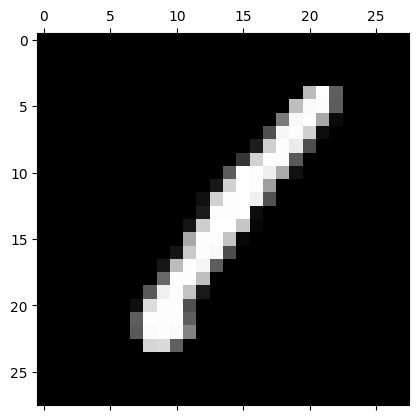

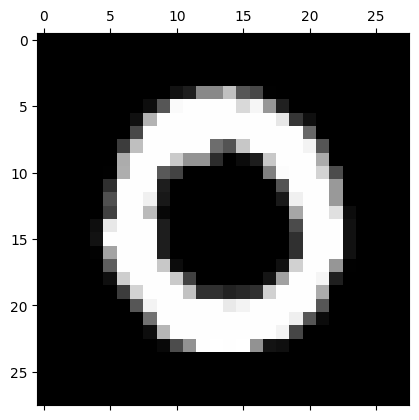

In [3]:
import matplotlib.pyplot as plt
for i in range(2):
    first_image = X_train.iloc[i].values
    image_array = first_image.reshape(28,28)
    plt.matshow(image_array, cmap='gray')
    plt.show()

In [4]:
def Format_Data_X(Data):
    Training_image_array = Data.values
    Resized_image_array = Training_image_array.reshape(Data.values.shape[0],28,28, 1)
    Resized_image_array = Resized_image_array / 255.0
    return Resized_image_array
Resized_image_array_X = Format_Data_X(X_train)

In [5]:
def Format_Data_y(Data):
    Training_image_array_y = Data.values
    Training_image_array_y = np.array(Training_image_array_y)
    return Training_image_array_y
Training_image_array_y = Format_Data_y(y_train)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Activation,Dense, Conv2D, MaxPooling2D, Flatten

Model = Sequential()

Model.add(Conv2D(64,(3,3), padding="same", input_shape=Resized_image_array_X.shape[1:]))
Model.add(Activation("sigmoid"))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(64,(3,3), padding = "same"))
Model.add(Activation("sigmoid"))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Dropout(0.2))

Model.add(Flatten())
Model.add(Dense(10))
Model.add(Activation("sigmoid"))

Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Model.summary()

2024-06-03 07:32:25.011035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 07:32:25.011156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 07:32:25.167083: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        31,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,938 (269.29 KB)

 Trainable params: 68,938 (269.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
History = Model.fit(Resized_image_array_X,Training_image_array_y, batch_size = 32,epochs = 20,validation_split = 0.2)

Epoch 1/20
  67/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1003 - loss: 2.4721

I0000 00:00:1717399961.653721      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717399961.674057      67 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2443 - loss: 2.0269

W0000 00:00:1717399964.639679      68 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2463 - loss: 2.0220 - val_accuracy: 0.8927 - val_loss: 0.3490
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8945 - loss: 0.3515 - val_accuracy: 0.9457 - val_loss: 0.1891
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9395 - loss: 0.2055 - val_accuracy: 0.9607 - val_loss: 0.1301
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9560 - loss: 0.1488 - val_accuracy: 0.9670 - val_loss: 0.1076
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9614 - loss: 0.1241 - val_accuracy: 0.9731 - val_loss: 0.0886
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9685 - loss: 0.1006 - val_accuracy: 0.9754 - val_loss: 0.0840
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9736 - loss: 0.0884 - val_accuracy: 0.9771 - val_loss: 0.0741
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9747 - loss: 0.0830 - val_accurac

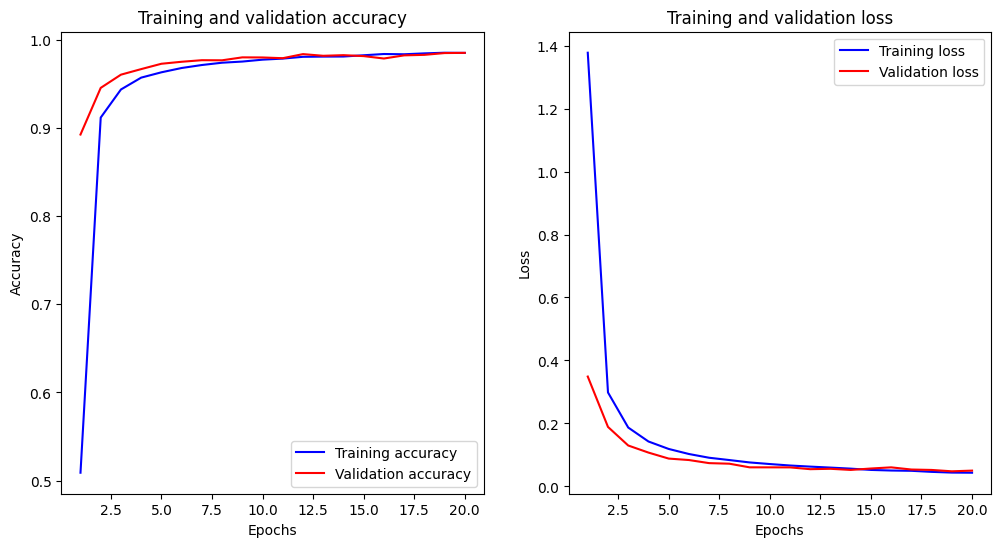

In [8]:
X_test = Testing_data
testing_X = Format_Data_X(X_test)

# Plot the training and validation accuracy and loss
# Retrieve a list of accuracy results on training and validation data
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

# Retrieve a list of loss results on training and validation data
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
y_pred = Model.predict(testing_X)
labels = []
for pred in y_pred:
    labels.append(np.argmax(pred))

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [10]:
Submission = pd.DataFrame(labels, columns = ['Label'])
Submission['ImageId'] = range(1, len(Submission) + 1)
Submission = Submission[["ImageId", 'Label']]
Submission.to_csv('/kaggle/working/submission.csv', index = False)
Submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
